In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('./data/diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [1]:
df.columns = ['pregnant', 'glucose', 'pressure', 'triceps_skin_fold', 'insulin', 'bmi', 'pedigree_function', 'age', 'class']

NameError: name 'df' is not defined

In [61]:
df

,pregnant,glucose,pressure,triceps_skin_fold,insulin,bmi,pedigree_function,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [62]:
df.dtypes

pregnant               int64
glucose                int64
pressure               int64
triceps_skin_fold      int64
insulin                int64
bmi                  float64
pedigree_function    float64
age                    int64
class                  int64
dtype: object

### Training Random Forest

In [63]:
X = df.drop('class', axis=1)
y = df['class']

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=00000)

In [65]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=20, random_state=00000)

In [66]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [67]:
# Train & Test Predictions

y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

### Model Evaluation

In [68]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(train_accuracy, test_accuracy)

0.994413407821229 0.7532467532467533


In [69]:
# Feature importances

feature_importances_df = pd.DataFrame(
    {'feature': list(X.columns), 'importance': random_forest.feature_importances_}
).sort_values('importance', ascending=False)


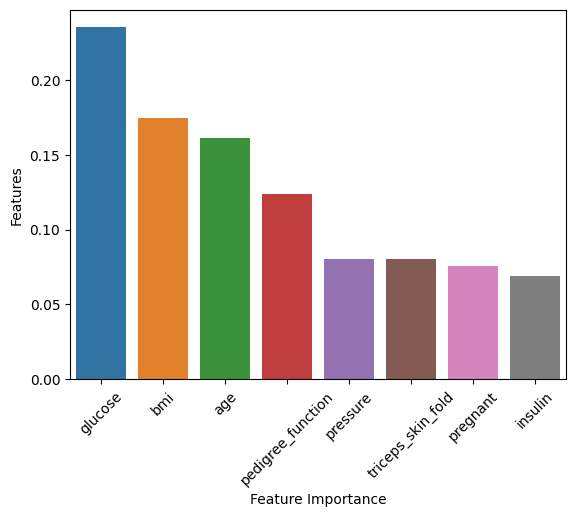

In [70]:
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.show()